# Challenge Task 1: Software Defect Prediction

# 1. Chuẩn bị và tiền xử lí dữ liệu
- dataApache (PROMISE): Dữ liệu từ dự án.
- dataEclipse: Dữ liệu từ dự án Eclipse.
- dataNASA: Dữ liệu từ các dự án phần mềm của NASA.

In [1]:
!pip install pandas numpy scikit-learn imbalanced-learn matplotlib seaborn
!pip install imbalanced-learn


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [3]:
# Step 1: Khai báo đường dẫn dữ liệu
data_apache_path = "./data/Software Defect Prediction - Data/dataApache(PROMISE)"  
data_eclipse_path = "./data/Software Defect Prediction - Data/dataEclipse"      
data_nasa_path = "./data/Software Defect Prediction - Data/dataNASA"             


In [4]:
# Đọc dữ liệu từ các thư mục
def load_data(data_path):
    files = os.listdir(data_path)
    data = []
    for file in files:
        if file.endswith(".csv"):  # Giả sử dữ liệu lưu dưới dạng CSV
            data.append(pd.read_csv(os.path.join(data_path, file)))
    return data

# Load dữ liệu từ các bộ dữ liệu
data_apache = load_data(data_apache_path)
data_eclipse = load_data(data_eclipse_path)
data_nasa = load_data(data_nasa_path)


## Phân tích dữ liệu gốc

In [5]:
print("Dữ liệu Apache: ", len(data_apache))
print("Dữ liệu Eclipse: ", len(data_eclipse))
print("Dữ liệu NASA: ", len(data_nasa))

print("Với bộ dữ liệu đầu tiên trong từng file")
print("Dữ liệu Apache: ", data_apache[0].shape)
print("Dữ liệu Eclipse: ", data_eclipse[0].shape)
print("Dữ liệu NASA: ", data_nasa[0].shape)



Dữ liệu Apache:  44
Dữ liệu Eclipse:  8
Dữ liệu NASA:  10
Với bộ dữ liệu đầu tiên trong từng file
Dữ liệu Apache:  (293, 22)
Dữ liệu Eclipse:  (1497, 63)
Dữ liệu NASA:  (1694, 40)


In [6]:
print("Thông tin tổng quan về bộ dữ liệu Apache:")
print(data_apache[0].info())


Thông tin tổng quan về bộ dữ liệu Apache:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    293 non-null    object 
 1   wmc     293 non-null    int64  
 2   dit     293 non-null    int64  
 3   noc     293 non-null    int64  
 4   cbo     293 non-null    int64  
 5   rfc     293 non-null    int64  
 6   lcom    293 non-null    int64  
 7   ca      293 non-null    int64  
 8   ce      293 non-null    int64  
 9   npm     293 non-null    int64  
 10  lcom3   293 non-null    float64
 11  loc     293 non-null    int64  
 12  dam     293 non-null    float64
 13  moa     293 non-null    int64  
 14  mfa     293 non-null    float64
 15  cam     293 non-null    float64
 16  ic      293 non-null    int64  
 17  cbm     293 non-null    int64  
 18  amc     293 non-null    float64
 19  max_cc  293 non-null    int64  
 20  avg_cc  293 non-null    float64
 2

bug
0     10974
1      3316
2      1424
3       438
4       229
5       128
6        72
7        57
8        41
9        31
11       19
10       18
13        8
12        8
17        7
14        7
16        5
18        5
15        5
23        3
21        3
30        2
36        2
25        2
19        2
28        2
24        2
20        2
22        1
62        1
31        1
37        1
40        1
47        1
45        1
Name: count, dtype: int64


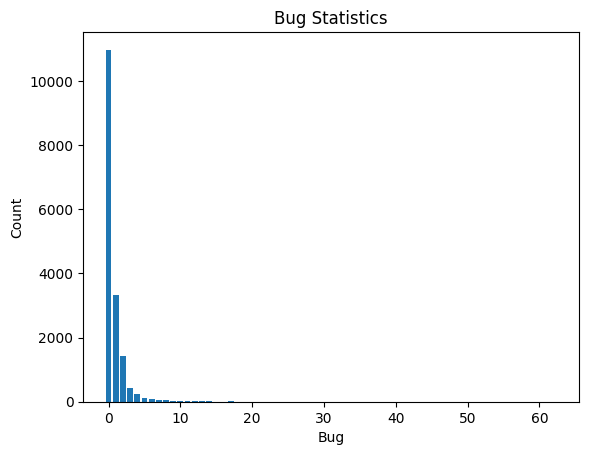

In [7]:
# Merge all Apache data into a single dataframe
data_apache = pd.concat(data_apache, ignore_index=True)

# Count the occurrences of each unique value in the 'bug' column
bug_counts = data_apache['bug'].value_counts()
print(bug_counts)
# Plot the graph
plt.bar(bug_counts.index, bug_counts.values)
plt.xlabel('Bug')
plt.ylabel('Count')
plt.title('Bug Statistics')
plt.show()

In [8]:
# Thống kê mô tả
print("Thống kê mô tả cho bộ dữ liệu Apache:")
print(data_apache.describe())


Thống kê mô tả cho bộ dữ liệu Apache:
                wmc           dit           noc           cbo           rfc  \
count  16819.000000  16819.000000  16819.000000  16819.000000  16819.000000   
mean      10.529223      2.098282      0.514121     10.751174     27.860158   
std       15.386190      1.379016      3.283847     17.340126     35.499063   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      1.000000      0.000000      3.000000      8.000000   
50%        6.000000      2.000000      0.000000      6.000000     18.000000   
75%       12.000000      3.000000      0.000000     12.000000     35.000000   
max      413.000000      8.000000    134.000000    499.000000    583.000000   

               lcom            ca            ce           npm         lcom3  \
count  16819.000000  16819.000000  16819.000000  16819.000000  16819.000000   
mean     102.247220      5.417980      5.876747      8.150128      2.293812   
std      724.

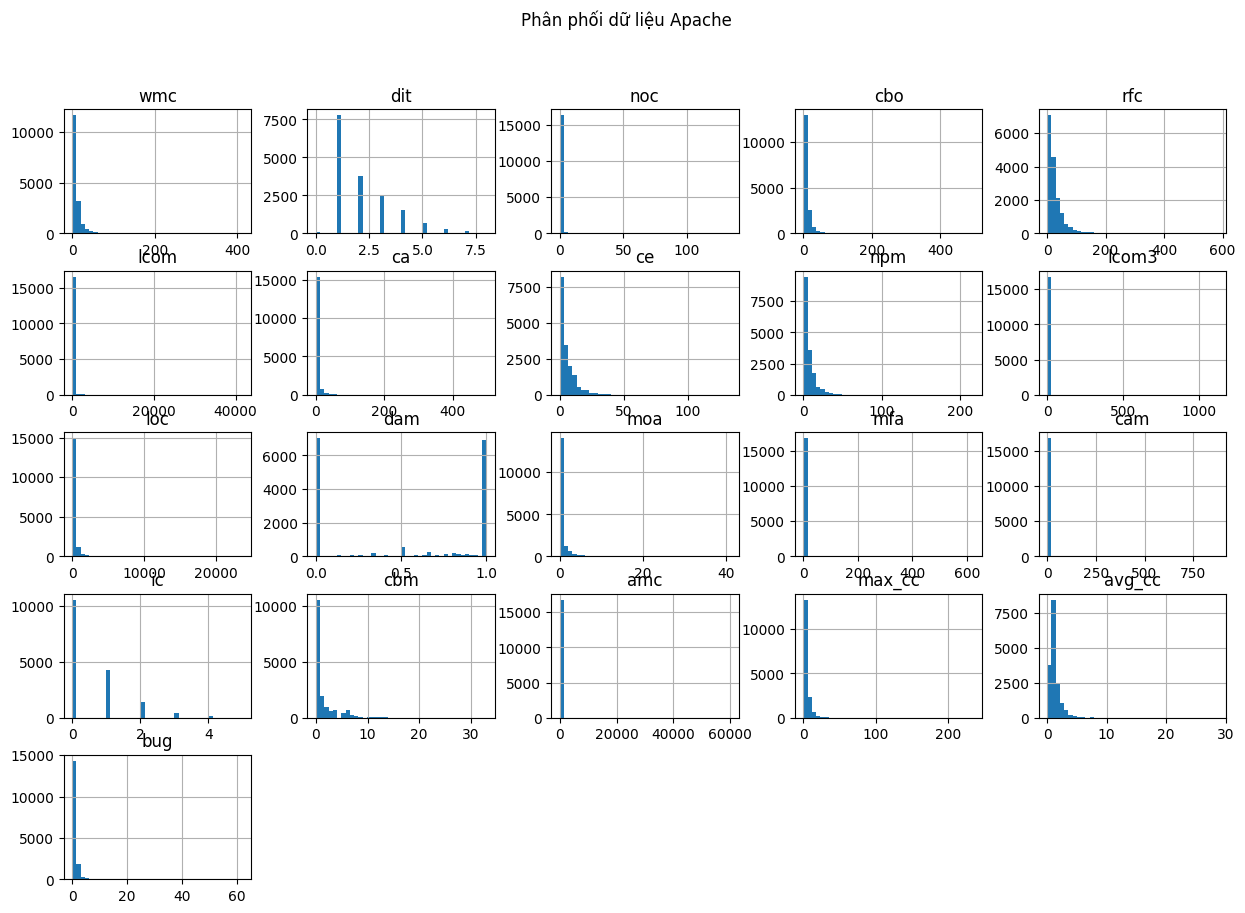

In [9]:
# Histogram cho cột số của Apache
data_apache.hist(bins=40, figsize=(15, 10))
plt.suptitle("Phân phối dữ liệu Apache")
plt.show()



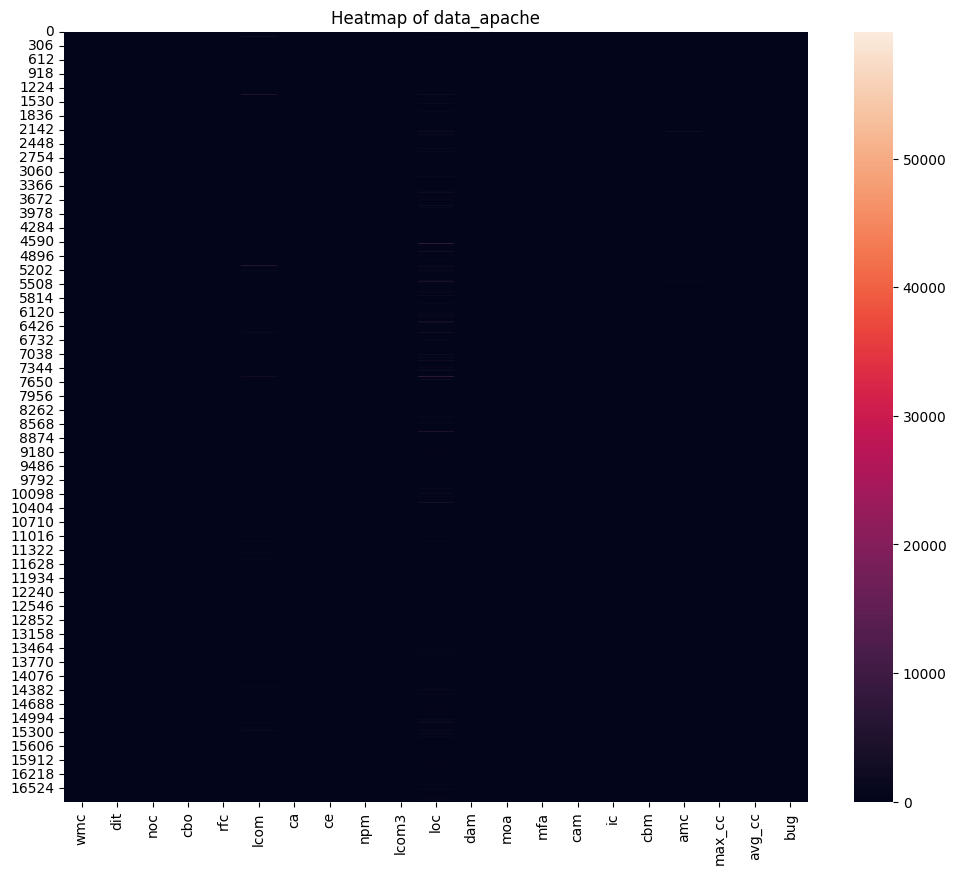

In [10]:
import seaborn as sns

import matplotlib.pyplot as plt
data_numeric = data_apache.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 10))
sns.heatmap(data_numeric)
plt.title('Heatmap of data_apache')
plt.show()

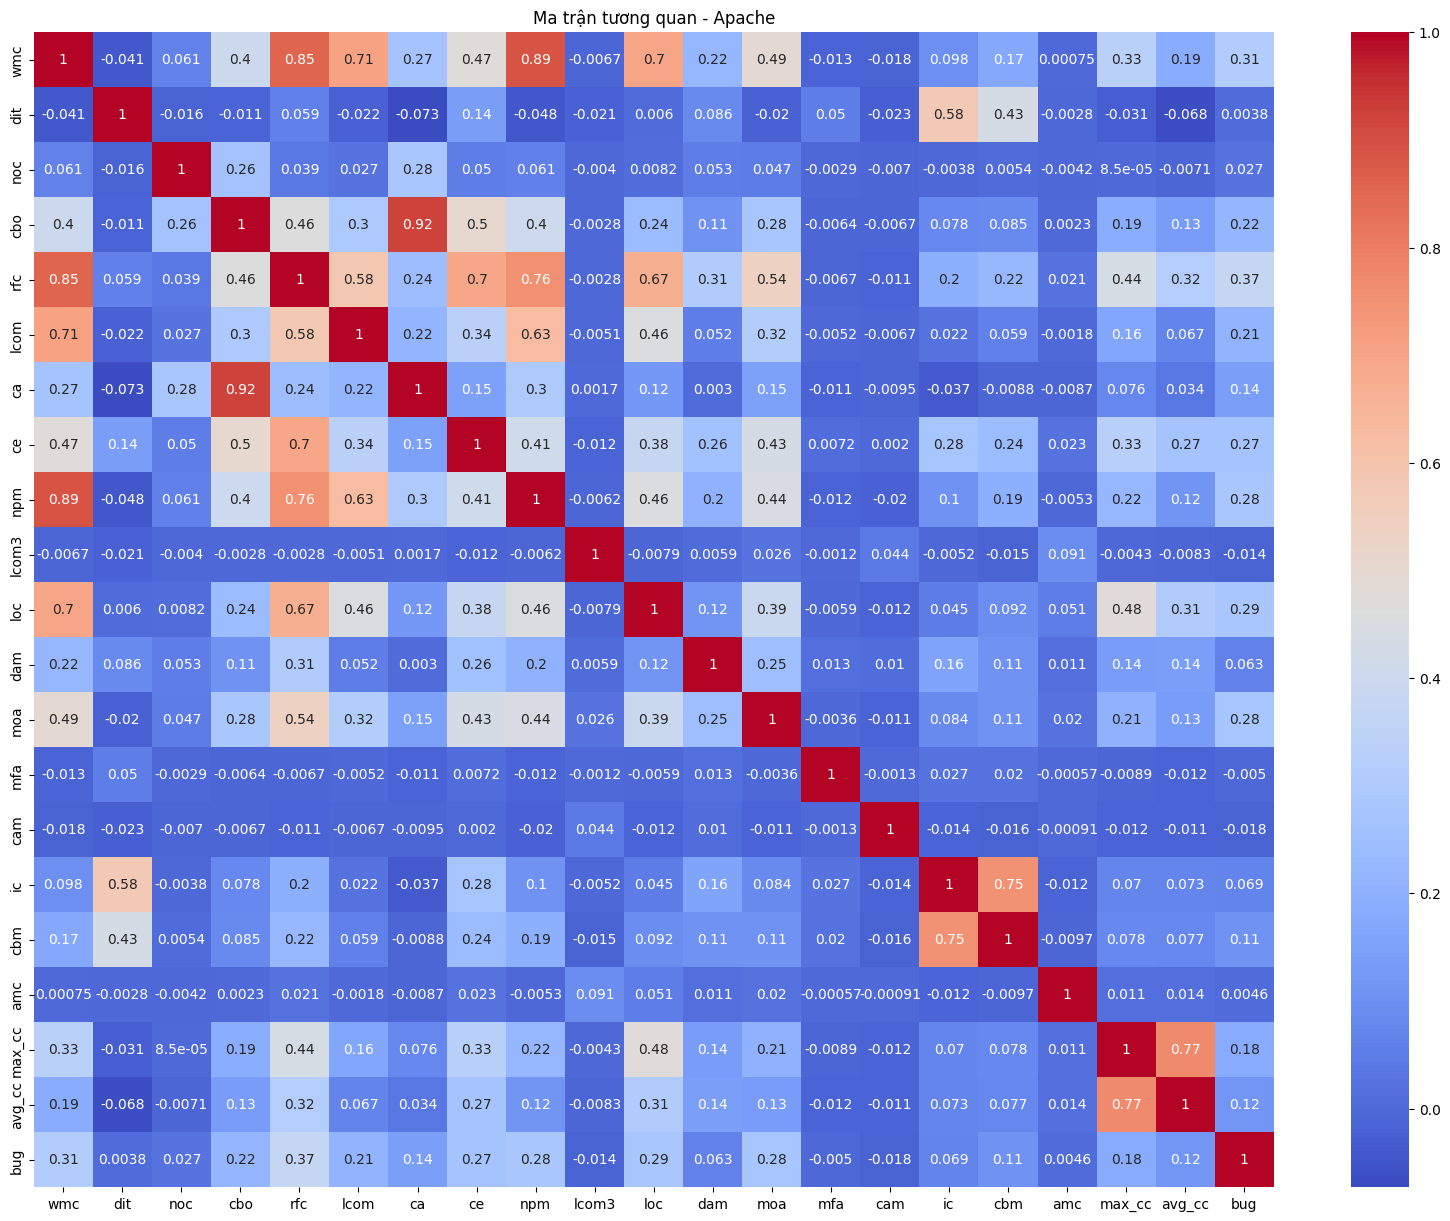

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

data_numeric = data_apache.select_dtypes(include=[float, int])

corr_matrix = data_numeric.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Ma trận tương quan - Apache")
plt.show()

## Tiền xử lí dữ liệu

In [12]:
data_apache.drop('name', axis=1, inplace=True)

In [13]:
target = data_apache['bug']
features = data_apache.drop('bug', axis=1)
features = features.drop(features.columns[0], axis=1)

In [14]:
def calculate_relevance(x):
    if x == 0:
        return 0  
    elif 1 <= x <= 3:
        return 1  
    elif 4 <= x <= 9:
        return 2  
    else:
        return 3  

target = target.apply(calculate_relevance)
print(target.value_counts())

bug
0    10974
1     5178
2      558
3      109
Name: count, dtype: int64


In [15]:
# Check for missing data
print(features.isnull().sum())

dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
dtype: int64


In [16]:
# Thay thế giá trị không hợp lệ hoặc ký tự đặc biệt (ví dụ: '-') bằng NaN
#data_apache.replace('-', pd.NA, inplace=True)

# Thay thế giá trị chuỗi (nếu có cột chuỗi mà cần chuyển thành số)
#for col in data_apache.columns:
#    data_apache[col] = pd.to_numeric(data_apache[col], errors='coerce')  # Chuyển đổi dữ liệu không phải số thành NaN

# Điền giá trị thiếu (NaN)
# Với dữ liệu số: Điền bằng giá trị trung bình (mean)
#data_apache.fillna(data_apache.mean(), inplace=True)



In [17]:
# Xử lý dữ liệu thiếu và chuyển đổi dữ liệu cho features
def preprocess_features(features):
    # Xử lý dữ liệu thiếu cho cột số
    numeric_columns = features.select_dtypes(include=['number']).columns  # Chỉ các cột số
    features[numeric_columns] = features[numeric_columns].fillna(features[numeric_columns].mean())  # Điền giá trị thiếu bằng trung bình
    
    # Xử lý dữ liệu thiếu và chuyển đổi cho cột phân loại
    categorical_columns = features.select_dtypes(include=['object']).columns  # Chỉ các cột chuỗi
    for col in categorical_columns:
        # Điền giá trị thiếu bằng mode (giá trị xuất hiện nhiều nhất)
        features[col] = features[col].fillna(features[col].mode()[0])
        # Chuyển toàn bộ dữ liệu trong cột thành chuỗi
        features[col] = features[col].astype(str)
        # Chuyển đổi cột phân loại thành mã số (integer encoding)
        label_encoder = LabelEncoder()
        features[col] = label_encoder.fit_transform(features[col])
    
    return features

features = preprocess_features(features)

# Kiểm tra dữ liệu sau xử lý
print("Dữ liệu features sau khi xử lý:")
print(features.head())
print("Loại dữ liệu:")
print(features.dtypes)


Dữ liệu features sau khi xử lý:
   dit  noc  cbo  rfc  lcom  ca  ce  npm     lcom3  loc   dam  moa       mfa  \
0    6    0    9   34    28   0   9    6  0.812500  166  1.00    0  0.950617   
1    4    0    7   37     4   0   7    7  0.714286  277  1.00    0  0.917647   
2    3    0    8   39     0   0   8    4  0.333333  200  1.00    0  0.925000   
3    3    0   16   77    69   0  16   10  0.826531  504  1.00    0  0.725490   
4    3    0    3   37    41   1   2   14  0.696429  437  0.75    1  0.454545   

        cam  ic  cbm        amc  max_cc  avg_cc  
0  0.400000   4    9  17.222222       2   1.000  
1  0.468750   4    4  32.875000       5   1.375  
2  0.500000   1    1  48.500000       1   0.750  
3  0.233333   1    1  32.133333       6   1.400  
4  0.311111   1    2  27.333333       1   0.800  
Loại dữ liệu:
dit         int64
noc         int64
cbo         int64
rfc         int64
lcom        int64
ca          int64
ce          int64
npm         int64
lcom3     float64
loc        

In [18]:
# Check again for missing data
print(features.isnull().sum())

dit       0
noc       0
cbo       0
rfc       0
lcom      0
ca        0
ce        0
npm       0
lcom3     0
loc       0
dam       0
moa       0
mfa       0
cam       0
ic        0
cbm       0
amc       0
max_cc    0
avg_cc    0
dtype: int64


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Chuyển kết quả về DataFrame
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)

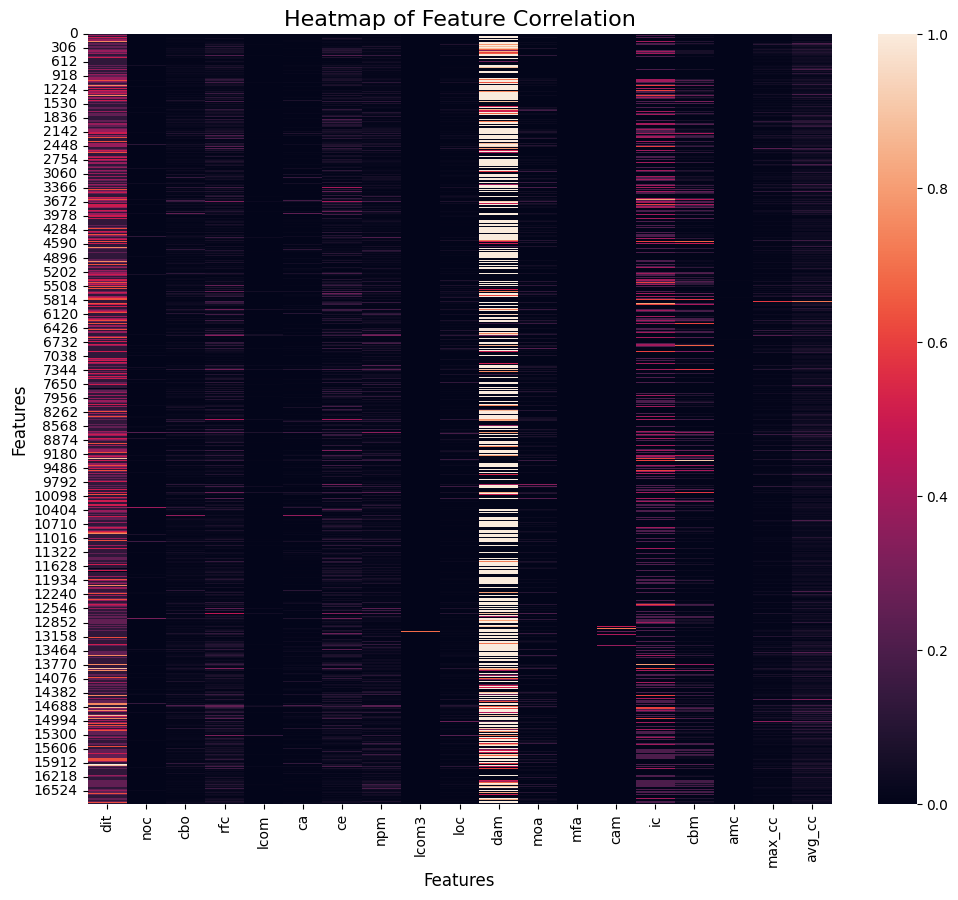

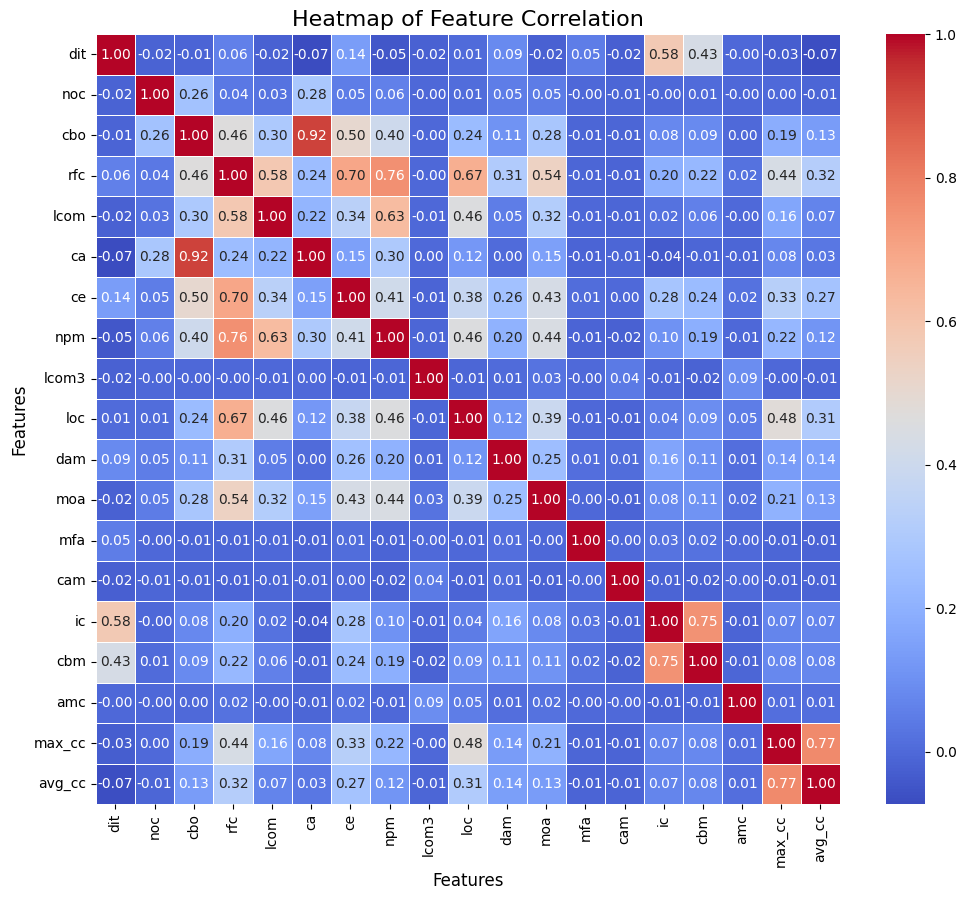

In [20]:
# Tạo ma trận tương quan từ DataFrame
corr_matrix = features_scaled_df.corr()

# Vẽ heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(features_scaled_df )
plt.title('Heatmap of Feature Correlation', fontsize=16)
plt.ylabel('Features', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.show()


corr_matrix = features_scaled_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Feature Correlation', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

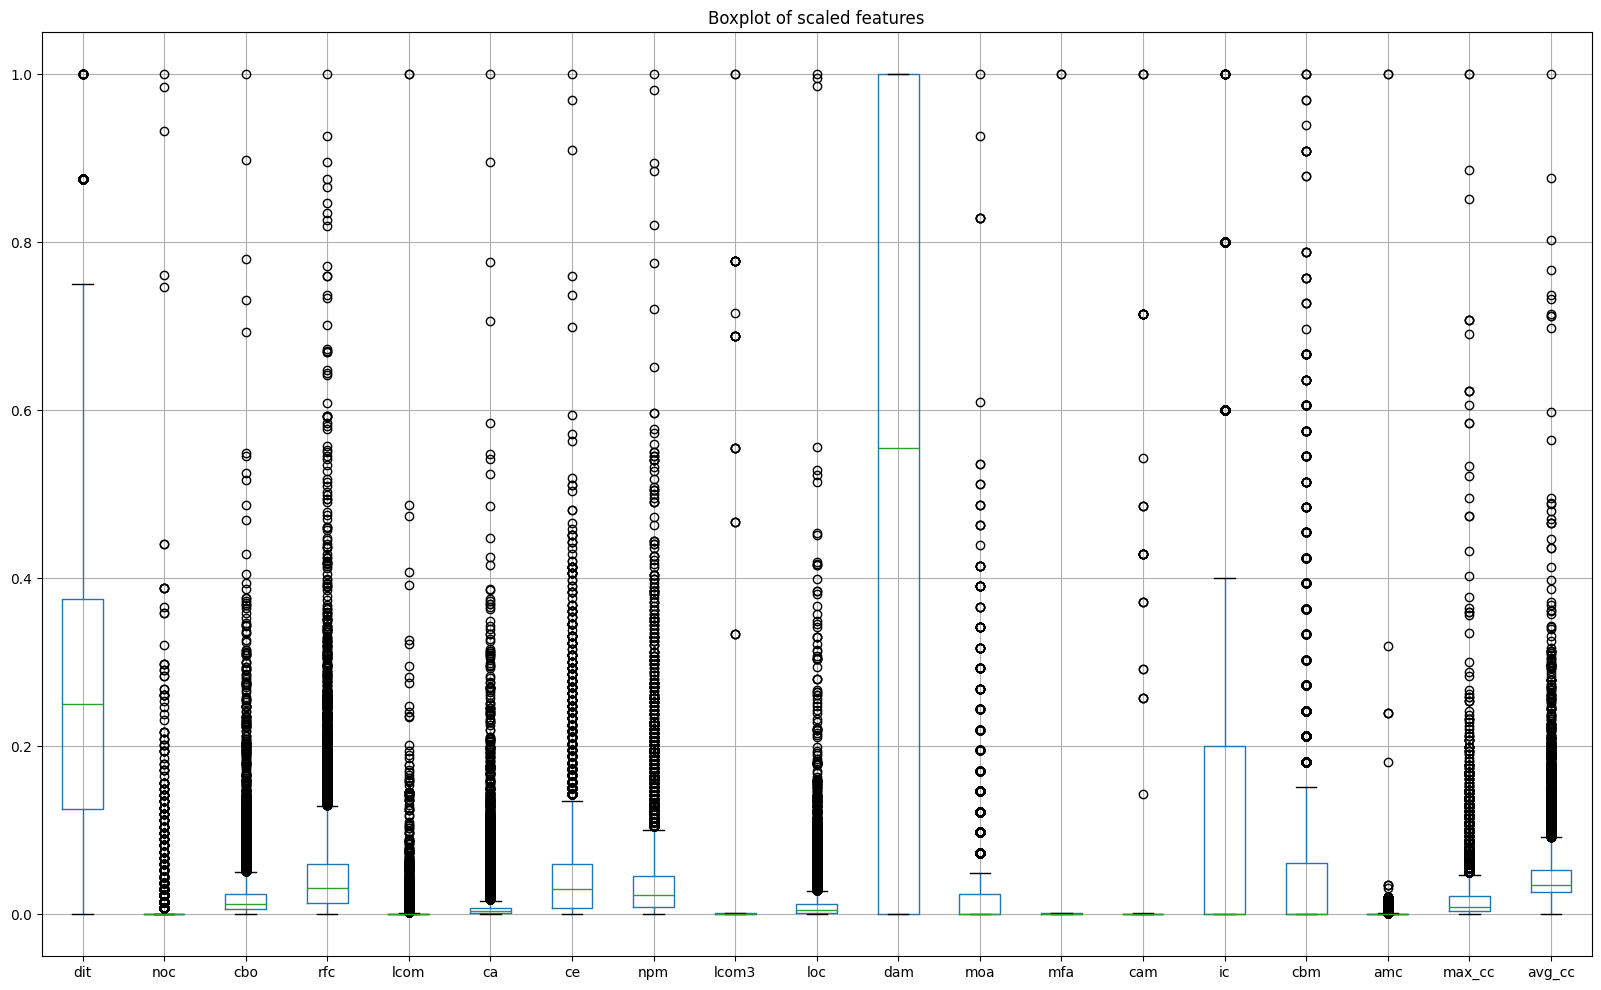

In [21]:
#box plot
plt.figure(figsize=(20, 12))
features_scaled_df.boxplot()
plt.title('Boxplot of scaled features')
plt.show()


In [22]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer

# Kiểm tra dữ liệu âm trước khi áp dụng chi-square
features = features.clip(lower=0)
    
# Lựa chọn đặc trưng (SelectKBest)
selector = SelectKBest(chi2, k=min(10, features.shape[1])) 
features_selected = selector.fit_transform(features, target)

In [23]:
# Lấy các cột được chọn
selector = SelectKBest(chi2, k=6) 
selector.fit(features, target)  
selected_features = features.columns[selector.get_support()]
print("Các đặc trưng được chọn: ", selected_features)

Các đặc trưng được chọn:  Index(['cbo', 'rfc', 'lcom', 'npm', 'loc', 'amc'], dtype='object')


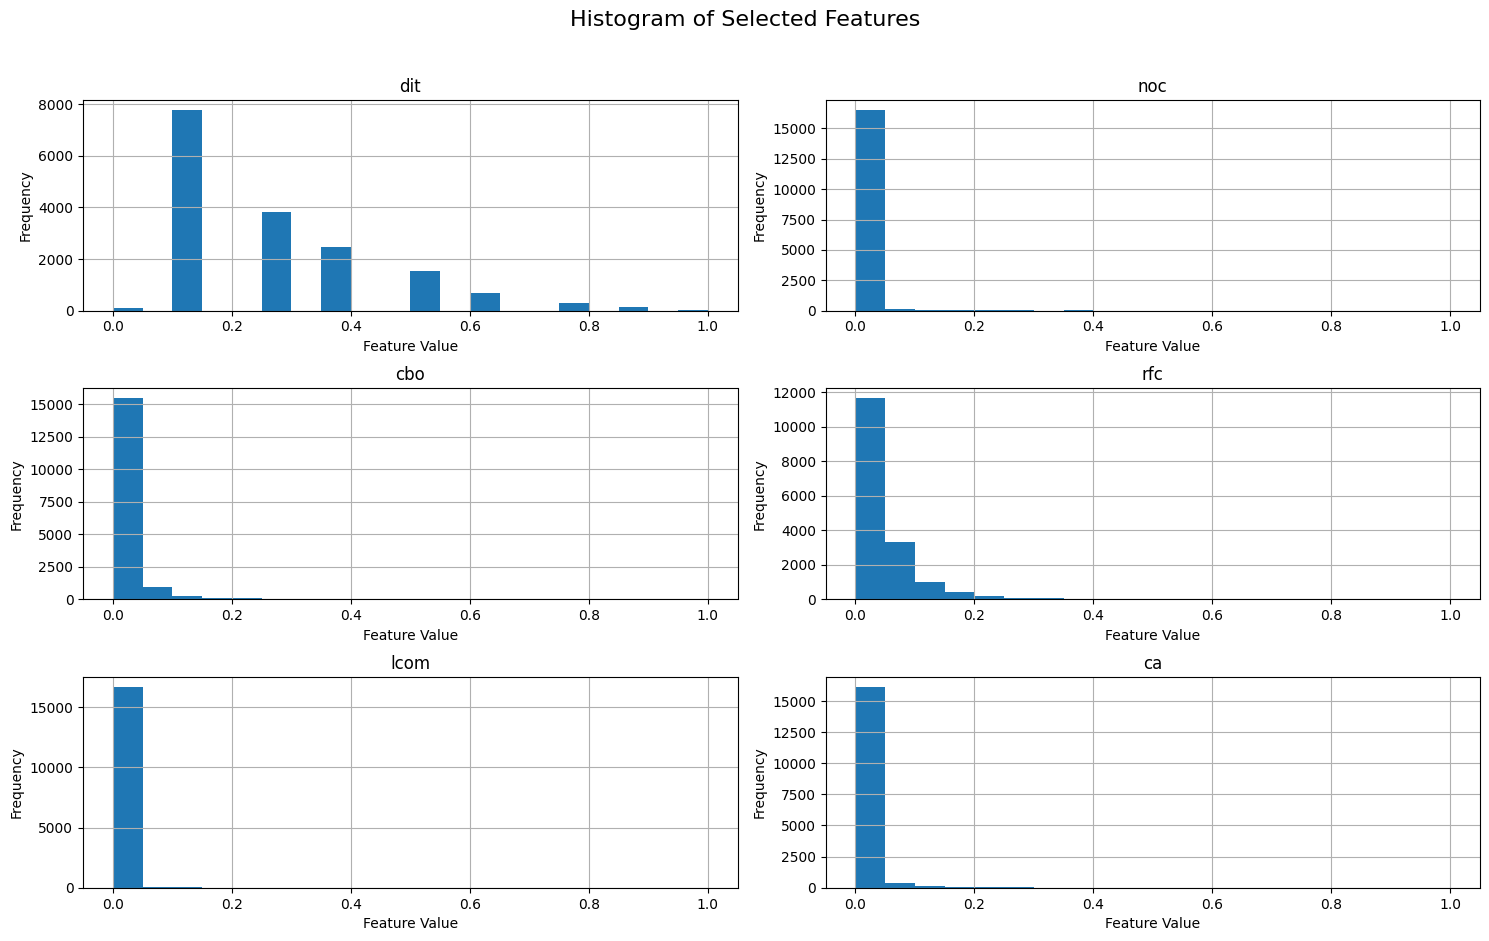

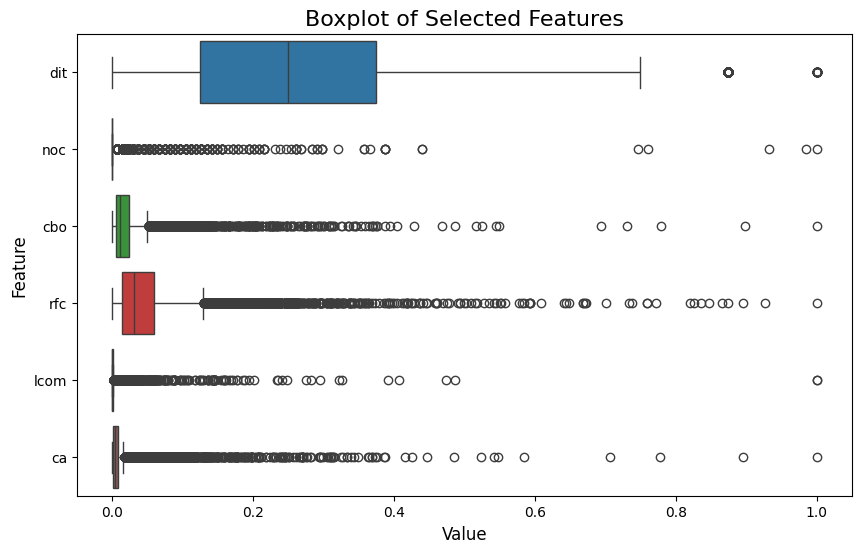

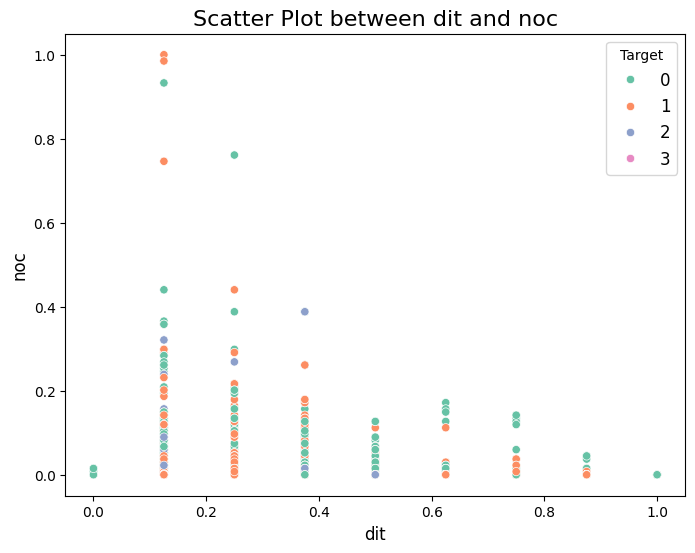

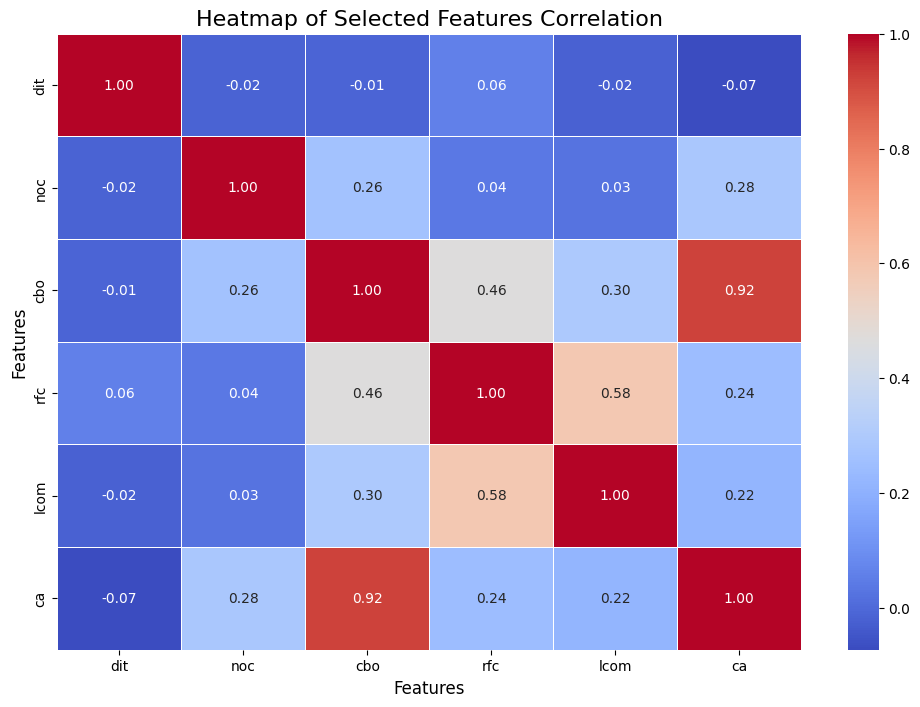

In [24]:
features_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
features_scaled_df['Target'] = target  

num_features_to_plot = min(6, features_scaled_df.shape[1] - 1)
selected_features = features.columns[:num_features_to_plot] 

# 1. Histogram để kiểm tra phân phối của các đặc trưng
plt.figure(figsize=(15, 15))
for i, feature in enumerate(selected_features):
    plt.subplot(5, 2, i + 1)  # Tạo lưới 5 hàng, 2 cột
    features_scaled_df[feature].hist(bins=20)
    plt.xlabel('Feature Value', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.title(feature, fontsize=12)

plt.suptitle('Histogram of Selected Features', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# 2. Boxplot để phát hiện các điểm ngoại lệ
plt.figure(figsize=(10, 6))
sns.boxplot(data=features_scaled_df[selected_features], orient='h')
plt.title('Boxplot of Selected Features', fontsize=16)
plt.xlabel('Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

# 3. Scatter plot để kiểm tra sự tương quan giữa 2 đặc trưng
# Chọn 2 đặc trưng cụ thể để vẽ scatter plot
feature_x, feature_y = selected_features[:2]  # Lấy 2 đặc trưng đầu tiên
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features_scaled_df[feature_x], y=features_scaled_df[feature_y], hue=features_scaled_df['Target'], palette='Set2')
plt.title(f'Scatter Plot between {feature_x} and {feature_y}', fontsize=16)
plt.xlabel(feature_x, fontsize=12)
plt.ylabel(feature_y, fontsize=12)
plt.legend(title='Target', loc='upper right', fontsize=12)
plt.show()

# 4. Heatmap của ma trận tương quan
correlation_matrix = features_scaled_df[selected_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Selected Features Correlation', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

# 5. Pairplot để xem phân phối và mối quan hệ giữa các đặc trưng

#sns.pairplot(features_scaled_df, hue='Target', palette='Set2')
#plt.suptitle('Pairplot of Selected Features', y=1.02, fontsize=16)
#plt.show()


# 2. Huấn luyện

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import numpy as np

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
f1_scores = []
auc_scores = []

for train_index, test_index in kf.split(features_scaled, target):
    X_train, X_test = features_scaled[train_index], features_scaled[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  

    accuracies.append(accuracy)
    f1_scores.append(f1)
    

# Trung bình các chỉ số
mean_accuracy = np.mean(accuracies)
mean_f1 = np.mean(f1_scores)

print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean F1 Score: {mean_f1}")


Mean Accuracy: 0.6583031471744517
Mean F1 Score: 0.6365574553868267


In [26]:
# Áp dụng SMOTE-PENN
def apply_smote_penn(X_train, y_train):
    # Sử dụng SMOTE để tạo các mẫu giả cho lớp thiểu số
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Sử dụng ENN để loại bỏ các mẫu không phù hợp từ lớp chiếm ưu thế
    enn = EditedNearestNeighbours()
    X_resampled, y_resampled = enn.fit_resample(X_resampled, y_resampled)

    return X_resampled, y_resampled


In [27]:

X_train_resampled, y_train_resampled = apply_smote_penn(features_selected, target)

print(f"Original training set size: {features_selected.shape[0]}")
print(f"Resampled training set size: {X_train_resampled.shape[0]}")


Original training set size: 16819
Resampled training set size: 35432


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Khởi tạo StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Biến lưu kết quả
accuracies = []
f1_scores = []

for train_index, test_index in kf.split(features_selected, target):
    # Chia dữ liệu thành train và test fold
    X_train, X_test = features_selected[train_index], features_selected[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    # Áp dụng SMOTE-PENN cho tập huấn luyện
    X_train_resampled, y_train_resampled = apply_smote_penn(X_train, y_train)
    
    # Khởi tạo và huấn luyện mô hình
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_resampled, y_train_resampled)
    
    # Dự đoán trên test fold
    y_pred = rf_model.predict(X_test)
    
    # Tính các chỉ số
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted cho bài toán đa lớp
    
    # Lưu kết quả
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Trung bình các chỉ số
mean_accuracy_rf = np.mean(accuracies)
mean_f1_rf = np.mean(f1_scores)

# Trả về kết quả
print(f"Mean Accuracy: {mean_accuracy}")
print(f"Mean F1 Score: {mean_f1}")


Mean Accuracy: 0.6583031471744517
Mean F1 Score: 0.6365574553868267


In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Khởi tạo StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Biến lưu kết quả
accuracies = []
f1_scores = []

for train_index, test_index in kf.split(features_selected, target):
    # Chia dữ liệu thành train và test fold
    X_train, X_test = features_selected[train_index], features_selected[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    # Áp dụng SMOTE-PENN cho tập huấn luyện
    X_train_resampled, y_train_resampled = apply_smote_penn(X_train, y_train)
    
    # Khởi tạo và huấn luyện mô hình SVM
    svm_model = SVC(kernel='rbf', C=1.0, random_state=42)  # Kernel RBF là phổ biến
    svm_model.fit(X_train_resampled, y_train_resampled)
    
    # Dự đoán trên test fold
    y_pred = svm_model.predict(X_test)
    
    # Tính các chỉ số
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted cho bài toán đa lớp
    
    # Lưu kết quả
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Trung bình các chỉ số
mean_accuracy_svm = np.mean(accuracies)
mean_f1_svm = np.mean(f1_scores)

# Trả về kết quả
print(f"Mean Accuracy: {mean_accuracy_svm}")
print(f"Mean F1 Score: {mean_f1_svm}")


Mean Accuracy: 0.5638267457676619
Mean F1 Score: 0.5222536972465218


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Khởi tạo StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Biến lưu kết quả
accuracies = []
f1_scores = []

for train_index, test_index in kf.split(features_selected, target):
    # Chia dữ liệu thành train và test fold
    X_train, X_test = features_selected[train_index], features_selected[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    # Áp dụng SMOTE-PENN cho tập huấn luyện
    X_train_resampled, y_train_resampled = apply_smote_penn(X_train, y_train)
    
    # Khởi tạo và huấn luyện mô hình Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_train_resampled, y_train_resampled)
    
    # Dự đoán trên test fold
    y_pred = nb_model.predict(X_test)
    
    # Tính các chỉ số
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted cho bài toán đa lớp
    
    # Lưu kết quả
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Trung bình các chỉ số
mean_accuracy_nb = np.mean(accuracies)
mean_f1_nb = np.mean(f1_scores)

# Trả về kết quả
print(f"Mean Accuracy: {mean_accuracy_nb}")
print(f"Mean F1 Score: {mean_f1_nb}")


Mean Accuracy: 0.25744690329786657
Mean F1 Score: 0.14276509216960895


In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Khởi tạo StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Biến lưu kết quả
accuracies = []
f1_scores = []

for train_index, test_index in kf.split(features_selected, target):
    # Chia dữ liệu thành train và test fold
    X_train, X_test = features_selected[train_index], features_selected[test_index]
    y_train, y_test = target[train_index], target[test_index]
    
    # Áp dụng SMOTE-PENN cho tập huấn luyện
    X_train_resampled, y_train_resampled = apply_smote_penn(X_train, y_train)
    
    # Khởi tạo và huấn luyện mô hình Logistic Regression
    lr_model = LogisticRegression(max_iter=1000, random_state=42)  # max_iter để đảm bảo hội tụ
    lr_model.fit(X_train_resampled, y_train_resampled)
    
    # Dự đoán trên test fold
    y_pred = lr_model.predict(X_test)
    
    # Tính các chỉ số
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted cho bài toán đa lớp
    
    # Lưu kết quả
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Trung bình các chỉ số
mean_accuracy_lr = np.mean(accuracies)
mean_f1_lr = np.mean(f1_scores)

# Trả về kết quả
print(f"Mean Accuracy: {mean_accuracy_lr}")
print(f"Mean F1 Score: {mean_f1_lr}")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Mean Accuracy: 0.5725072597049163
Mean F1 Score: 0.521501407482648


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


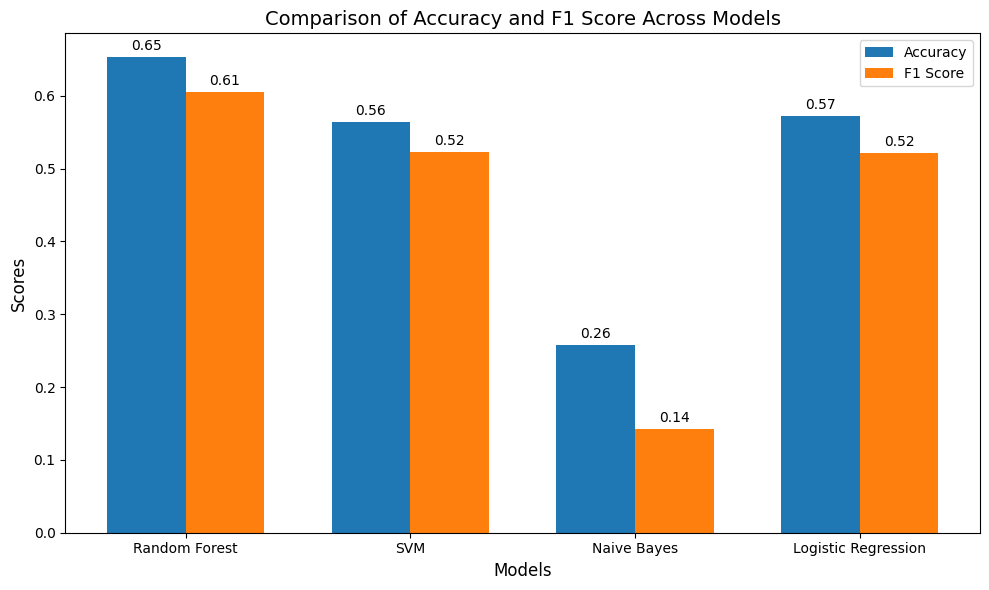

: 

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Giá trị giả định của F1 và Accuracy cho các model
models = ["Random Forest", "SVM", "Naive Bayes", "Logistic Regression"]
f1_scores = [mean_f1_rf, mean_f1_svm, mean_f1_nb, mean_f1_lr]  # Giả định
accuracy_scores = [mean_accuracy_rf, mean_accuracy_svm, mean_accuracy_nb, mean_accuracy_lr]  # Giả định

# Vẽ biểu đồ
x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score')

# Gán nhãn và tiêu đề
ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('Scores', fontsize=12)
ax.set_title('Comparison of Accuracy and F1 Score Across Models', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Hiển thị giá trị trên các cột
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}', 
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [33]:
!pip install tensorflow
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Chuẩn bị dữ liệu cho RankNet
def prepare_ranknet_data(features, target):
    """
    Tạo các cặp thực thể từ dữ liệu.
    """
    pairs_features = []
    pairs_labels = []

    for i in range(len(target)):
        for j in range(i + 1, len(target)):
            if target[i] != target[j]:
                if target[i] > target[j]:
                    pairs_features.append((features[i], features[j]))
                    pairs_labels.append(1)  # A tốt hơn B
                else:
                    pairs_features.append((features[j], features[i]))
                    pairs_labels.append(0)  # B tốt hơn A

    return np.array(pairs_features), np.array(pairs_labels)

# Tạo các cặp dữ liệu
pairs_features, pairs_labels = prepare_ranknet_data(features_scaled, target)

# Chia dữ liệu thành train/test
X_train, X_test, y_train, y_test = train_test_split(pairs_features, pairs_labels, test_size=0.2, random_state=42)


In [ ]:
# Tạo mô hình RankNet
def create_ranknet_model(input_dim):
    """
    Xây dựng mô hình RankNet với TensorFlow/Keras.
    """
    input_a = layers.Input(shape=(input_dim,))
    input_b = layers.Input(shape=(input_dim,))

    # Mạng chia sẻ tham số
    shared_network = models.Sequential([
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.2)
    ])

    processed_a = shared_network(input_a)
    processed_b = shared_network(input_b)

    # Tính toán điểm chênh lệch
    score_diff = layers.Subtract()([processed_a, processed_b])
    output = layers.Dense(1, activation='sigmoid')(score_diff)

    model = models.Model(inputs=[input_a, input_b], outputs=output)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Input dimension
input_dim = features_scaled.shape[1]
ranknet_model = create_ranknet_model(input_dim)

# Tách cặp dữ liệu
X_train_a = np.array([pair[0] for pair in X_train])
X_train_b = np.array([pair[1] for pair in X_train])
X_test_a = np.array([pair[0] for pair in X_test])
X_test_b = np.array([pair[1] for pair in X_test])


NameError: name 'layers' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)


Best parameters found by GridSearchCV:
{'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Huấn luyện lại mô hình với các tham số tối ưu
best_rf_model = grid_search.best_estimator_

# Dự đoán lại trên tập kiểm tra
y_pred_best = best_rf_model.predict(X_test)

# Đánh giá mô hình sau khi tuning tham số
print(f"Accuracy after tuning: {accuracy_score(y_test, y_pred_best)}")
print("Classification Report after tuning:")
print(classification_report(y_test, y_pred_best))


Accuracy after tuning: 0.6774193548387096
Classification Report after tuning:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81      2412
           1       0.57      0.19      0.29      1049
           2       0.17      0.28      0.22       113
           3       0.12      0.27      0.17        22

    accuracy                           0.68      3596
   macro avg       0.40      0.41      0.37      3596
weighted avg       0.66      0.68      0.64      3596



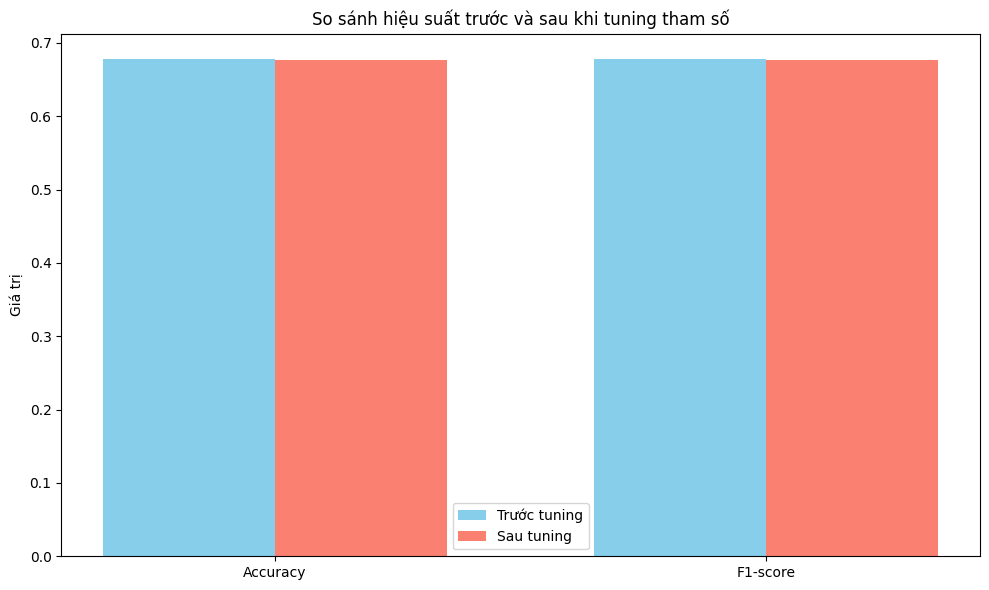

Classification Report before tuning:
{'0': {'precision': 0.728538283062645, 'recall': 0.9112769485903814, 'f1-score': 0.809725547983054, 'support': 2412.0}, '1': {'precision': 0.5750708215297451, 'recall': 0.19351763584366063, 'f1-score': 0.289586305278174, 'support': 1049.0}, '2': {'precision': 0.18994413407821228, 'recall': 0.3008849557522124, 'f1-score': 0.2328767123287671, 'support': 113.0}, '3': {'precision': 0.10638297872340426, 'recall': 0.22727272727272727, 'f1-score': 0.14492753623188406, 'support': 22.0}, 'accuracy': 0.67853170189099, 'macro avg': {'precision': 0.39998405434850165, 'recall': 0.40823806686474545, 'f1-score': 0.3692790254554698, 'support': 3596.0}, 'weighted avg': {'precision': 0.6630388607381966, 'recall': 0.67853170189099, 'f1-score': 0.6358002030762466, 'support': 3596.0}}
Classification Report after tuning:
{'0': {'precision': 0.7295681063122924, 'recall': 0.9104477611940298, 'f1-score': 0.8100331980818886, 'support': 2412.0}, '1': {'precision': 0.573863636

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Huấn luyện mô hình Random Forest với dữ liệu đã cân bằng trước khi tuning tham số
rf_model_original = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_original.fit(X_train_resampled, y_train_resampled)

# Dự đoán trên tập kiểm tra
y_pred_original = rf_model_original.predict(X_test)

# Đánh giá mô hình trước khi tuning tham số
accuracy_original = accuracy_score(y_test, y_pred_original)
classification_report_original = classification_report(y_test, y_pred_original, output_dict=True)

# Tuning tham số (Hyperparameter Tuning) với GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Huấn luyện lại mô hình với tham số tối ưu
best_rf_model = grid_search.best_estimator_

# Dự đoán trên tập kiểm tra
y_pred_best = best_rf_model.predict(X_test)

# Đánh giá mô hình sau khi tuning tham số
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_report_best = classification_report(y_test, y_pred_best, output_dict=True)

# So sánh trước và sau tuning: Accuracy và F1-score
labels = ['Accuracy', 'F1-score']
before_tuning = [accuracy_original, classification_report_original['accuracy']]
after_tuning = [accuracy_best, classification_report_best['accuracy']]

# Vẽ biểu đồ so sánh
x = np.arange(len(labels))  # Vị trí các chỉ số

fig, ax = plt.subplots(figsize=(10, 6))

# Biểu đồ cột so sánh giữa trước và sau tuning tham số
width = 0.35  # Độ rộng của cột
rects1 = ax.bar(x - width/2, before_tuning, width, label='Trước tuning', color='skyblue')
rects2 = ax.bar(x + width/2, after_tuning, width, label='Sau tuning', color='salmon')

# Thêm các chi tiết vào biểu đồ
ax.set_ylabel('Giá trị')
ax.set_title('So sánh hiệu suất trước và sau khi tuning tham số')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

# In báo cáo chi tiết
print("Classification Report before tuning:")
print(classification_report_original)
print("Classification Report after tuning:")
print(classification_report_best)
